# Basic SetUp



In [ ]:
from google.colab import userdata
APIkey=userdata.get('HF_TOKEN')

In [ ]:
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.0/164.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 kB 22.5 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai

In [ ]:
genai.configure(api_key=APIkey)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# List Models

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827


# Model Initialization

In [ ]:
model=genai.GenerativeModel('gemini-1.5-pro-latest')

## Chatting

In [ ]:
chat=model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-pro-latest',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [ ]:
response=chat.send_message("In one sentence, explain how a computer works to a young child.")
response.text

'A computer is like a very smart toy that follows your instructions by understanding special words and numbers. \n'

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a very smart toy that follows your instructions by understanding special words and numbers. \n"
 }
 role: "model"]

# Video Processing Section:

In [ ]:
import time

video=genai.upload_file(path="/content/drive/MyDrive/demo-video.mp4")

while video.state=="PROCESSING":
  time.sleep(5)
  video=genai.get_file(name=video.name)

In [ ]:
response=model.generate_content(["Summarize the video in points and properly explain all maths involved", video])

In [ ]:
print(response.text)

The video explains a trick to find the day of the week for any given date using a few simple math steps.

**Steps:**

1. **Isolate the last two digits of the year:**
   - For example, for the year 2015, the last two digits are "15".
2. **Divide the number from Step 1 by 4:**
   - In our example, 15 divided by 4 is 3 with a remainder of 3. **Note:** We only care about the remainder in this step.
3. **Write down the date of the month:**
   - If the date is 5 July 2015, write down "5".
4. **Find the month code:**
   - Each month has a specific code:
      - January: 0
      - February: 3
      - March: 3
      - April: 6
      - May: 1
      - June: 4
      - July: 6
      - August: 2
      - September: 5
      - October: 0
      - November: 3
      - December: 5
   - For July, the code is "6". Write this down.
5. **Find the year code:**
   - The year code depends on the century:
      - 1600s: 6
      - 1700s: 4
      - 1800s: 2
      - 1900s: 0
      - 2000s: 6
   - For 2015, the code i

# Story Generation

In [ ]:
response=model.generate_content(["Write a random short story of about 1000 words or more -on sci-fi future setting. Also, mention the most appropriate Title for the story."])

In [ ]:
print(response.text)

## The Echoes of Silence

The neon rain, thick and viscous as it dripped from the towering data towers, cast the alleyway in a sickly green glow. Anya huddled deeper into the damp shadows, clutching the small, metallic orb to her chest.  Her heart hammered a frantic rhythm against her ribs, mimicking the relentless thrum of the city that never slept. New Shanghai, they called it. A testament to human ambition, a concrete jungle that scraped the sky. To Anya, it was a cage. 

She tightened her grip on the orb, the cool metal a stark contrast to the feverish heat that bloomed across her skin. The Fever. A silent plague that swept through the lower levels, leaving a trail of delirium and death. The officials claimed it was a malfunctioning weather control system, but the whispers in the darkness told a different story. Whispers of a virus, engineered to cull the overcrowded population. Whispers that Anya clung to.

She dared not stay still for too long. The Enforcers, faceless automatons 

# Auxiliary Story Section:

In [ ]:
str1='''## The Echo of Silence

The year is 2347. The Great Silence, as they called it, had fallen upon the universe a century ago. It wasn't a literal silence; the cosmos still hummed with the cosmic microwave background radiation, the whispers of stellar winds, the roar of distant quasars. But for humans, it was a deafening quiet.

No more alien signals, no more strange whispers from the void. The once-thriving galactic community had gone silent, leaving humanity alone, clinging to their corner of the Milky Way.

Captain Elara Vance adjusted the worn leather of her captain's chair, the faint scent of dust and old space voyages filling her nostrils.  The bridge of the exploratory vessel, *Aurora*, was a familiar comfort, a symphony of blinking lights and murmuring consoles. Outside, the vast, swirling nebula of the Andromeda Galaxy painted the viewport with ethereal hues of purple and gold.

"Captain, we're picking up a faint signal," announced Lieutenant Kai, his youthful face illuminated by the flickering holographic display. "Origin point seems to be...the Kepler-186f system."

Elara's breath hitched. Kepler-186f, a planet deemed habitable a millennia ago, yet always shrouded in silence. Could this be it? A break in the Great Silence?

"Analyze the signal, Lieutenant," she ordered, her voice steady despite the tremor running through her.

The bridge crew, a mix of seasoned veterans and bright-eyed recruits, sprang into action. Elara watched, a storm of emotions churning within her. Hope, fear, and a gnawing sense of responsibility for the weight of humanity's expectations.

Hours crawled by, each tick of the chronometer a hammer blow against Elara's patience. Finally, Kai straightened, his expression a mixture of awe and apprehension.

"Captain, the signal is… music. An intricate composition, unlike anything we've encountered."

Music? Elara had dedicated her life to deciphering alien languages, to understanding the intricate complexities of extraterrestrial technology. But music… music was something else entirely. It spoke of emotions, of a soul, of a shared experience that transcended the barriers of language.

"Can we pinpoint the source?" she asked, her voice barely a whisper.

"It seems to be emanating from a structure on the planet's surface," Kai reported, pulling up a holographic image.

The image flickered, revealing a majestic, crystalline structure, shimmering like a beacon against the backdrop of the alien landscape. It was breathtaking, an architectural marvel that defied human comprehension.

"Prepare a landing party," Elara commanded, her voice firm now, resolute. "We're going down."

The landing was tense, the alien landscape both beautiful and unsettling in its stillness. As they approached the crystalline structure, its surface rippled with an otherworldly luminescence. The music grew stronger, resonating through the very air they breathed, a symphony of haunting melodies and complex harmonies.

Inside, the structure pulsed with a soft, ethereal light. The air thrummed with an unseen energy, and strange symbols, etched into the crystalline walls, glowed with an inner fire. The source of the music lay at the heart of the structure: a colossal crystal, its facets shimmering with an array of colors.

As they drew closer, Elara noticed faint etchings on the crystal’s surface, a series of intricate patterns that seemed to shift and flow like a living thing. She reached out, her fingers brushing against its cool surface.

Suddenly, the air crackled with energy. The symbols on the walls flared, bathing the chamber in blinding light. Elara gasped as images flooded her mind, vivid and strange, yet filled with an aching familiarity.

She saw a civilization not unlike her own, vibrant and full of life, their technology exceeding even the wildest dreams of humanity. She saw their joy, their sorrow, their hopes, and dreams reflected in the shimmering facets of the crystal.

Then, just as suddenly, it was gone. The light faded, leaving a chilling silence in its wake. Elara staggered, overwhelmed by the sheer volume of information, of emotions, of a history both alien and profoundly human.

"Captain, are you alright?" Kai asked, his voice laced with concern.

Elara drew a shaky breath, trying to make sense of what she had experienced. The civilization, the music, the sudden silence… it was as if they had been given a glimpse into a mirror, reflecting their own possible future.

"They're gone," she whispered, her voice heavy with unspoken grief. "They reached out, seeking connection, sharing their story… and then, silence."

As she stared at the silent crystal, a chilling realization dawned on her. The Great Silence wasn't a choice, it was a warning. A testament to the fragility of life, the ever-present possibility of extinction.

The music, a beautiful, haunting echo, was all that remained. A testament to a civilization that once was, a poignant reminder of what humanity stood to lose.

Elara knew then that their mission had changed. They had come searching for answers, for an end to their cosmic isolation. Instead, they had found a solemn duty - to carry the echo of that lost civilization, to ensure their story, their music, their warning, would not be forgotten.

For in the silence, they had found their voice. The voice of a species standing on the precipice, determined to learn from the past, to fight for their future, to break the cycle of silence and forge a new symphony of existence.
'''

## Necessary Function

In [ ]:
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Text Processing

In [ ]:
response=model.generate_content(["Find some lighthearted moments here",str1])

In [ ]:
print(response.text)

While the overall tone of your story is serious and thought-provoking, there are definitely opportunities to sprinkle in some lighthearted moments. Here are a few ideas: 

**Character Interactions:**

* **Kai's Enthusiasm:** Kai is described as youthful and eager. You could play up his excitement over the signal, maybe having him geek out over the complexity of the alien music in a way that contrasts Elara's more serious demeanor. 
    * Example: *“Captain,” Kai exclaimed, his voice practically a squeak, “The time signatures! The harmonic progressions! It’s like Bach on a three-day bender with a sentient synthesizer!”* 
* **Crew Banter:**  Even in tense situations, a bit of camaraderie and humor can shine through. Perhaps two crew members share a quick, lighthearted exchange about the questionable food rations or speculate about the aliens' taste in music.
    * Example:  *"I bet they had holographic karaoke nights," Jones chuckled, adjusting a dial on his console. "Imagine a Glargon t

In [ ]:
to_markdown(response.text)

> While the overall tone of your story is serious and thought-provoking, there are definitely opportunities to sprinkle in some lighthearted moments. Here are a few ideas: 
> 
> **Character Interactions:**
> 
> * **Kai's Enthusiasm:** Kai is described as youthful and eager. You could play up his excitement over the signal, maybe having him geek out over the complexity of the alien music in a way that contrasts Elara's more serious demeanor. 
>     * Example: *“Captain,” Kai exclaimed, his voice practically a squeak, “The time signatures! The harmonic progressions! It’s like Bach on a three-day bender with a sentient synthesizer!”* 
> * **Crew Banter:**  Even in tense situations, a bit of camaraderie and humor can shine through. Perhaps two crew members share a quick, lighthearted exchange about the questionable food rations or speculate about the aliens' taste in music.
>     * Example:  *"I bet they had holographic karaoke nights," Jones chuckled, adjusting a dial on his console. "Imagine a Glargon trying to hit those high notes."*
> 
> **Situational Humor:**
> 
> * **Lost in Translation:** When deciphering the alien culture, there could be some humorous misunderstandings or mistranslations, especially when it comes to cultural practices or technology.
>     * Example:  *Elara frowned at the holographic display. “The inscription seems to suggest they communicated through interpretive dance battles?”*  *“Maybe that’s why they went silent,” Kai mumbled under his breath.*
> * **Fish Out of Water:**  The crew's initial exploration of the alien structure could lead to some amusing moments as they try to navigate an unfamiliar environment.
>     * Example: *Miller, a seasoned engineer, tripped over a seemingly invisible threshold. “Note to self,” he muttered, dusting himself off, “Alien architecture doesn’t believe in right angles.”*
> 
> **Remember:**
> 
> * **Subtlety is Key:**  The humor shouldn't undermine the story's overall message but rather provide moments of levity and relatability. 
> * **Respect the Tone:** The humor should be appropriate for the setting and characters, avoiding anything overly silly or disrespectful to the story's themes.
> 
> By weaving in these lighthearted touches, you can create a more engaging and dynamic reading experience, adding depth and realism to your characters and their journey. 


# Image Processing

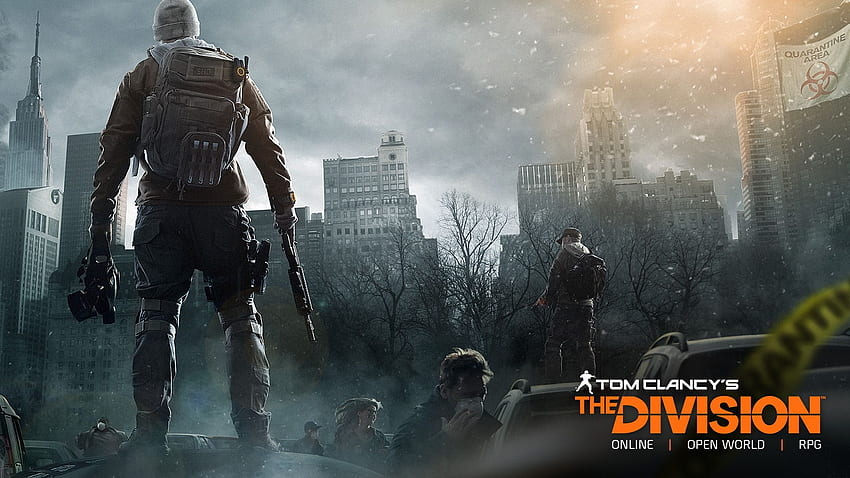

In [ ]:
import PIL.Image

img = PIL.Image.open('/content/desktop-wallpaper-tom-clancy-the-division-rpg-2015.jpg')
img

In [ ]:
print(f"Format: {img.format}, Size: {img.size}, Mode: {img.mode}")

Format: JPEG, Size: (850, 478), Mode: RGB


In [ ]:
response = model.generate_content(img)
to_markdown(response.text)

> The image appears to be promotional art for the video game "Tom Clancy's The Division". 
> 
> Here are some details:
> 
> * **Setting:** A snowy, post-apocalyptic New York City. Skyscrapers are visible in the background, many of them partially destroyed. Cars are abandoned and covered in snow.
> * **Characters:** The image focuses on a man with his back turned, wearing tactical gear, a backpack, and a balaclava. He holds a gun in his right hand and appears to be a survivor in the ravaged city. Another figure, similarly dressed, is seen further back walking in the street. A group of people, presumably more survivors, are huddled near the bottom of the frame. 
> * **Mood:** The overall mood is bleak and desolate, highlighting the game's themes of survival and urban decay. The snow and overcast sky contribute to this atmosphere. 
> * **Branding:** The "Tom Clancy's The Division" logo is prominently displayed in the lower third of the image, along with the words "ONLINE | OPEN WORLD | RPG," indicating the game's genre and features. 
> 
> The image effectively captures the essence of "The Division," promising an intense and immersive experience in a post-pandemic world. 
